In [2]:
import numpy as np
import scipy
import pickle
import time
from tqdm import tqdm
from typing import (
    List,
    Optional,
    Tuple,
    Union
)
import random
import importlib

import quimb as qu
import quimb.tensor as qtn

import cotengra as ctg

import avqite_quimb

importlib.reload(avqite_quimb)

<module 'avqite_quimb' from '/Users/Aleksei/avqite-quimb/avqite_quimb.py'>

In [3]:
test_obj = avqite_quimb.Quimb_vqite(
    incar_file = "adaptvqite/adaptvqite/incars/incarN12g0.1",
    ansatz_file = "adaptvqite/adaptvqite/data/ansatz_inp.pkle",
    init_params = "random"
)

In [4]:
len(test_obj._params)

21

## Finding contraction paths for evaluating expectation values of Pauli strings in the Hamiltonian

### Simplification CRS

In [5]:
%%time

test_obj.h_terms_find_contractions(opt='greedy',simp='CRS')

CPU times: user 202 ms, sys: 9 ms, total: 211 ms
Wall time: 211 ms


In [6]:
contr_cost = [test_obj.h_terms_reh_dict[pauli_str]['C'] for pauli_str in test_obj._H.paulis]
print(contr_cost)

contr_width = [test_obj.h_terms_reh_dict[pauli_str]['W'] for pauli_str in test_obj._H.paulis]
print(contr_width)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


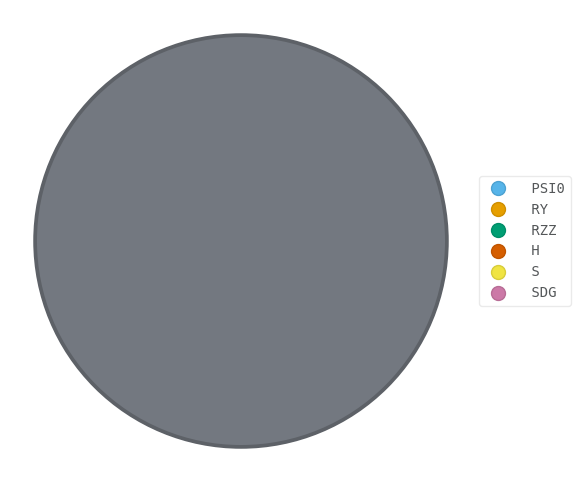

In [7]:
test_obj.h_terms_reh_dict[test_obj._H.paulis[1]]['tn'].draw(color=['PSI0','RY','RZZ','H','S','SDG'])

### No simplification

In [8]:
%%time

test_obj.h_terms_find_contractions(opt='greedy',simp='')

CPU times: user 197 ms, sys: 19.3 ms, total: 216 ms
Wall time: 204 ms


In [9]:
contr_cost = [test_obj.h_terms_reh_dict[pauli_str]['C'] for pauli_str in test_obj._H.paulis]
print(contr_cost)

contr_width = [test_obj.h_terms_reh_dict[pauli_str]['W'] for pauli_str in test_obj._H.paulis]
print(contr_width)

[2.499687082618404, 2.998259338423699, 2.8808135922807914, 2.8965262174895554, 2.8273692730538253, 2.850033257689769, 2.4409090820652177, 3.0382226383687185, 3.0017337128090005, 3.0086001717619175, 2.9656719712201065, 3.0318122713303706, 3.137354111370733, 3.2571984261393445, 3.1749315935284423, 3.1360860973840974, 3.093421685162235, 3.036628895362161, 3.1099158630237933, 3.4409090820652177, 3.428134794028789, 3.4149733479708178, 3.228400358703005, 3.161966616364075]
[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 4.0, 4.0]


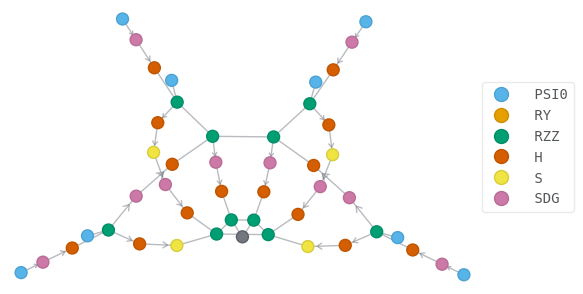

In [10]:
test_obj.h_terms_reh_dict[test_obj._H.paulis[1]]['tn'].draw(color=['PSI0','RY','RZZ','H','S','SDG'])

## Time test

In [11]:
%%time

test_obj.h_exp_val(params = None, opt = 'greedy',simp='CRS')

CPU times: user 184 ms, sys: 6.51 ms, total: 190 ms
Wall time: 186 ms


(-11.946067988528101+0j)

In [12]:
%%time 
for pauli_str in test_obj._H.paulis:
    t1 = time.time()
    qc = test_obj._base_circuits[-1].copy()
    
    where = [i for i,p in enumerate(pauli_str) if p!= 'I']
    paulis = [p for i,p in enumerate(pauli_str) if p!= 'I']
    
    operator = qu.pauli(paulis[0])
    for i in range(1,len(where)):
        operator = operator & qu.pauli(paulis[i]) 
    t2 = time.time()
    reh = qc.local_expectation(operator, where, optimize='greedy',simplify_sequence='CRS')
    t3 = time.time()
    print(t2-t1,t3-t2)

0.0009899139404296875 0.018232107162475586
0.0009326934814453125 0.012881994247436523
0.0005550384521484375 0.011880159378051758
0.0005879402160644531 0.01093602180480957
0.0005238056182861328 0.008922100067138672
0.0003819465637207031 0.007326841354370117
0.00036716461181640625 0.0043239593505859375
0.0003139972686767578 0.006604194641113281
0.0002999305725097656 0.00600886344909668
0.00026679039001464844 0.005368947982788086
0.0002472400665283203 0.005132913589477539
0.00024700164794921875 0.004410266876220703
0.00026106834411621094 0.005845069885253906
0.00027298927307128906 0.008004188537597656
0.00031280517578125 0.008366107940673828
0.0003337860107421875 0.008228063583374023
0.0002810955047607422 0.007721900939941406
0.00026702880859375 0.006067991256713867
0.00025391578674316406 0.006157636642456055
0.0002868175506591797 0.009006023406982422
0.0002598762512207031 0.008885860443115234
0.0002696514129638672 0.008404970169067383
0.0002651214599609375 0.006100893020629883
0.00028610

In [13]:
qc = test_obj._base_circuits[-1].copy()

opt = 'greedy'

%time reh = qc.local_expectation_rehearse(operator, where, optimize=opt,simplify_sequence='')

%time qc.local_expectation(operator, where, optimize=reh['tree'],simplify_sequence='');

%time reh['tn'].contract(all, optimize=reh['tree'], output_inds=())

mu=0
params1 = test_obj._params.copy()
params1[mu] = params1[mu]+np.pi/2

old_params_dict = qc.get_params()
new_params_dict = dict()
for i,key in enumerate(old_params_dict.keys()):
    new_params_dict[key]= np.array([params1[i]])
qc.set_params(new_params_dict)

# %time reh1 = qc.local_expectation_rehearse(operator, where, optimize=opt,simplify_sequence='')

%time qc.local_expectation(operator, where, optimize=reh['tree'],simplify_sequence='');

CPU times: user 18.8 ms, sys: 6.46 ms, total: 25.3 ms
Wall time: 20.5 ms
CPU times: user 6.81 ms, sys: 1.75 ms, total: 8.56 ms
Wall time: 49.5 ms
CPU times: user 784 μs, sys: 56 μs, total: 840 μs
Wall time: 800 μs
CPU times: user 10.6 ms, sys: 770 μs, total: 11.3 ms
Wall time: 12.3 ms


In [14]:
qc = test_obj._base_circuits[-1].copy()

opt = 'greedy'

%time reh = qc.local_expectation_rehearse(operator, where, optimize=opt,simplify_sequence='CRS')

%time qc.local_expectation(operator, where, optimize=reh['tree'],simplify_sequence='CRS');

%time reh['tn'].contract(all, optimize=reh['tree'], output_inds=())

mu=0
params1 = test_obj._params.copy()
params1[mu] = params1[mu]+np.pi/2

old_params_dict = qc.get_params()
new_params_dict = dict()
for i,key in enumerate(old_params_dict.keys()):
    new_params_dict[key]= np.array([params1[i]])
qc.set_params(new_params_dict)

# %time reh1 = qc.local_expectation_rehearse(operator, where, optimize=opt,simplify_sequence='')

%time qc.local_expectation(operator, where, optimize=reh['tree'],simplify_sequence='CRS');

CPU times: user 20.7 ms, sys: 6.16 ms, total: 26.8 ms
Wall time: 22.1 ms
CPU times: user 948 μs, sys: 58 μs, total: 1.01 ms
Wall time: 1.15 ms
CPU times: user 44 μs, sys: 9 μs, total: 53 μs
Wall time: 101 μs
CPU times: user 13.5 ms, sys: 411 μs, total: 13.9 ms
Wall time: 13.9 ms


## Comparison with AVQITE

In [21]:
#File ansatz_inp_i20.pkle is the ansatz saved during AVQITE at 20th iteration

test_obj = avqite_quimb.Quimb_vqite(
    incar_file = "adaptvqite/adaptvqite/incars/incarN12g0.1",
    ansatz_file = "adaptvqite/adaptvqite/data/ansatz_inp_i20.pkle",
    init_params = "avqite"
)

In [22]:
test_obj.compute_m(opt='greedy',simp = '',backend=None,which_nonzero=None)
test_obj._m

array([[ 2.50000000e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.33164650e-21,
         1.09797091e-37, -1.02672701e-37,  0.00000000e+00,
        -5.07998573e-21,  2.49703627e-01,  4.69811173e-38,
         1.00810396e-34, -3.76158192e-37,  3.39182339e-21],
       [ 0.00000000e+00,  2.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.66434690e-37,
         1.13372113e-20, -9.41478589e-39,  0.00000000e+00,
        -4.19656745e-37,  1.19876928e-37,  2.03489385e-24,
        -1.48985732e-20,  2.49794478e-01,  2.47814254e-35],
       [ 0.00000000e+00,  0.00000000e+00,  2.50000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e

In [23]:
#File M_V_i20.pkle are the M, V saved during AVQITE at 20th iteration

with open("adaptvqite/adaptvqite/data/M_V_i20.pkle", 'rb') as inp:
    data_inp = pickle.load(inp)
    M_adaptvqite = data_inp[0]
    V_adaptvqite = data_inp[1]

In [28]:
Mdiff = M_adaptvqite - test_obj._m
np.where((Mdiff>1e-14) == True)

(array([], dtype=int64), array([], dtype=int64))

In [29]:
test_obj.compute_v(opt='greedy',simp = '',backend=None)
test_obj._v

array([-0.00941754, -0.00945469, -0.00945055, -0.00944415, -0.00938479,
       -0.00944186, -0.0094506 , -0.00943999, -0.00941751, -0.00941439,
       -0.00944781, -0.00943017, -0.00942109, -0.00943052, -0.00938324,
       -0.0094121 , -0.00941213, -0.00942982, -0.00945064, -0.00943063,
       -0.00944415])

In [33]:
Vdiff = V_adaptvqite - test_obj._v
np.where((Vdiff>1e-14) == True)

(array([], dtype=int64),)